In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from os import walk
from tqdm import tqdm

### Read csv file with hopenet outputs

In [56]:
df = pd.read_csv("affectnet_train_model_direction.csv", index_col=None)
val_df = pd.read_csv("affectnet_val_model_direction.csv", index_col=None)

In [57]:
df.head()
val_df.head()

,class,filename,pitch,yaw,roll,direction
0,1,image0004172.jpg,-0.101674,0.260372,0.026084,2
1,1,image0002985.jpg,0.002530,0.100325,0.034182,0
2,1,image0002507.jpg,0.126349,0.085475,-0.175663,1
3,1,image0000594.jpg,0.196749,0.049497,0.006675,1
4,1,image0003238.jpg,-0.083720,0.230250,0.083975,2


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30770 entries, 0 to 30769
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   class      30770 non-null  int64  
 1   filename   30770 non-null  object 
 2   pitch      30770 non-null  float64
 3   yaw        30770 non-null  float64
 4   roll       30770 non-null  float64
 5   direction  30770 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 1.4+ MB


### VERY cool visualizations :)))))

In [44]:
direction_counts = df.groupby(['direction']).size().reset_index(name='count')
direction_counts

,direction,count
0,0,2843
1,1,5983
2,2,15087
3,3,2571
4,4,4286


In [45]:
direction_counts = df.groupby(['class', 'direction']).size().reset_index(name='count')
direction_counts
# direction_counts = val_df.groupby(['class', 'direction']).size().reset_index(name='count')
# direction_counts

,class,direction,count
0,1,0,427
1,1,1,746
2,1,2,1858
3,1,3,303
4,1,4,563
5,2,0,278
6,2,1,372
7,2,2,2561
8,2,3,273
9,2,4,450


In [7]:
# Define mappings for class and direction values
class_mapping = {1: 'Anger', 2: 'Contempt', 3: 'Disgust', 4: 'Fear', 5: 'Happy', 6: 'Neutral', 7: 'Sad', 8: 'Surprise'}
direction_mapping = {0: 'Front', 1: 'Up', 2: 'Down', 3: 'Right', 4: 'Left'}

# Apply the mappings to the dataframe
direction_counts['class'] = direction_counts['class'].map(class_mapping)
direction_counts['direction'] = direction_counts['direction'].map(direction_mapping)

direction_counts.head()

,class,direction,count
0,Anger,Front,427
1,Anger,Up,746
2,Anger,Down,1858
3,Anger,Right,303
4,Anger,Left,563


/home/sefni/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


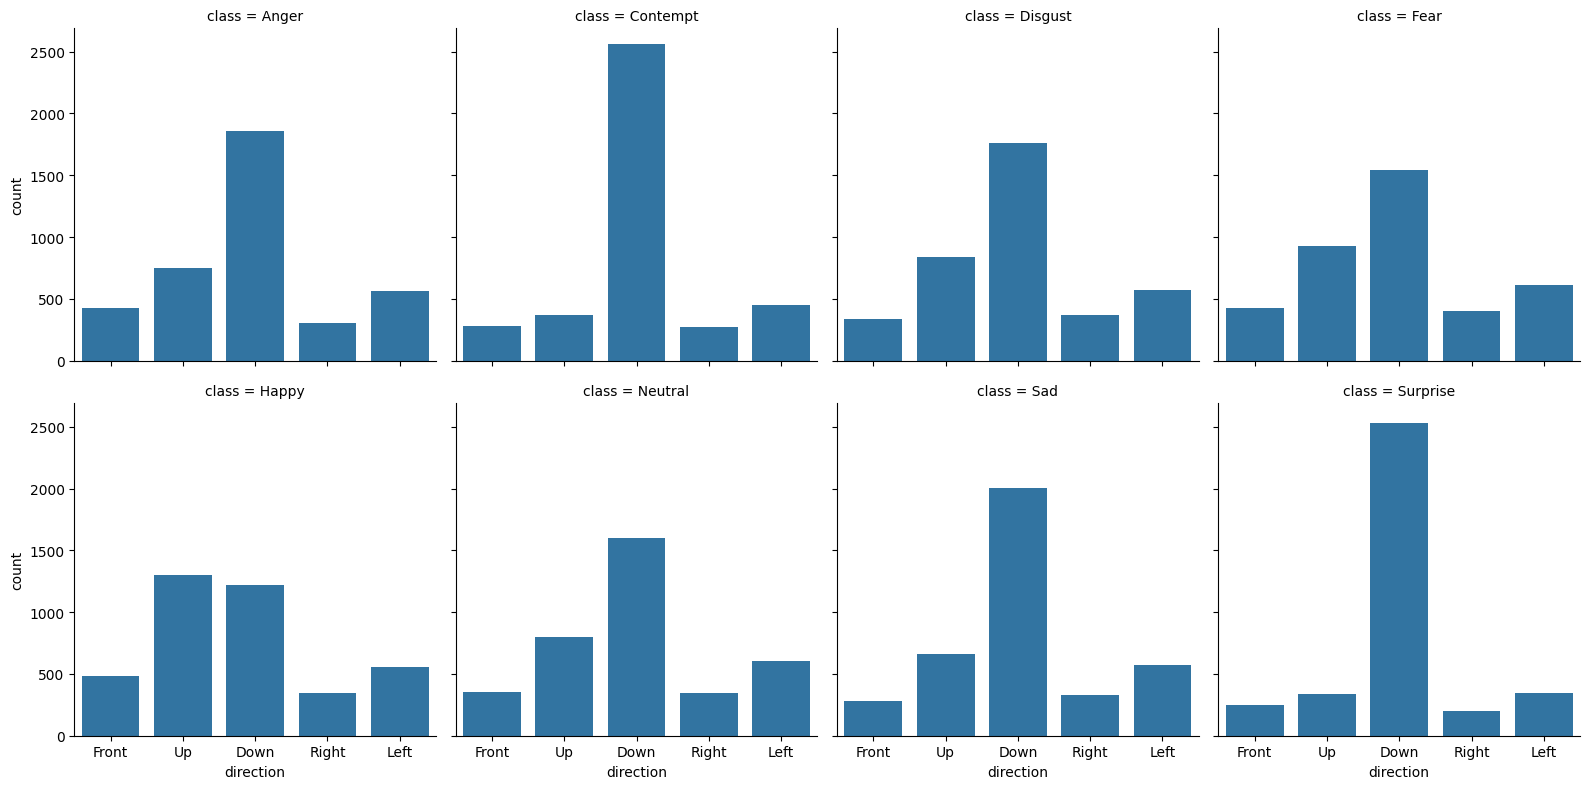

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create separate histograms for each class
g = sns.FacetGrid(direction_counts, col='class', col_wrap=4, height=4)
g.map(sns.barplot, 'direction', 'count')
plt.show()

There is clearly overrepresentation for direction class 2 (right) so we have to even the distribution to get clear result

### Approach two: balanced distribution of directions whithout regard for emotion
might give better represantation I guess

In [59]:
grouped = df.groupby('direction')

min_count = grouped.size().min()

balanced_df = grouped.apply(lambda x: x.sample(n=min_count))

balanced_df = balanced_df.reset_index(drop=True)

print(balanced_df)

       class          filename     pitch       yaw      roll  direction
0          1  image0017224.jpg  0.000396  0.059501  0.016278          0
1          3  image0007114.jpg -0.037717 -0.016217  0.030294          0
2          5  image0039192.jpg  0.004534  0.188617  0.007653          0
3          4  image0004033.jpg  0.041152 -0.053629  0.001548          0
4          4  image0034355.jpg -0.049342  0.130348  0.007723          0
...      ...               ...       ...       ...       ...        ...
12850      7  image0024654.jpg -0.036969 -0.457322 -0.051029          4
12851      7  image0024878.jpg  0.027346 -0.196825  0.001620          4
12852      5  image0039516.jpg  0.020945 -0.302948 -0.059786          4
12853      7  image0019950.jpg -0.206391 -0.230167 -0.024520          4
12854      6  image0042386.jpg  0.156626 -0.393107 -0.027327          4

[12855 rows x 6 columns]


In [60]:
direction_counts = balanced_df.groupby(['direction']).size().reset_index(name='count')
direction_counts

,direction,count
0,0,2571
1,1,2571
2,2,2571
3,3,2571
4,4,2571


In [61]:
direction_counts = balanced_df.groupby(['class', 'direction']).size().reset_index(name='count')
direction_counts

,class,direction,count
0,1,0,389
1,1,1,313
2,1,2,313
3,1,3,303
4,1,4,359
5,2,0,245
6,2,1,159
7,2,2,448
8,2,3,273
9,2,4,268


In [62]:
# Define mappings for class and direction values
class_mapping = {1: 'Anger', 2: 'Contempt', 3: 'Disgust', 4: 'Fear', 5: 'Happy', 6: 'Neutral', 7: 'Sad', 8: 'Surprise'}
direction_mapping = {0: 'Forward', 1: 'Up', 2: 'Down', 3: 'Right', 4: 'Left'}

# Apply the mappings to the dataframe
direction_counts['class'] = direction_counts['class'].map(class_mapping)
direction_counts['direction'] = direction_counts['direction'].map(direction_mapping)

direction_counts.head()

,class,direction,count
0,Anger,Forward,389
1,Anger,Up,313
2,Anger,Down,313
3,Anger,Right,303
4,Anger,Left,359


/home/sefni/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


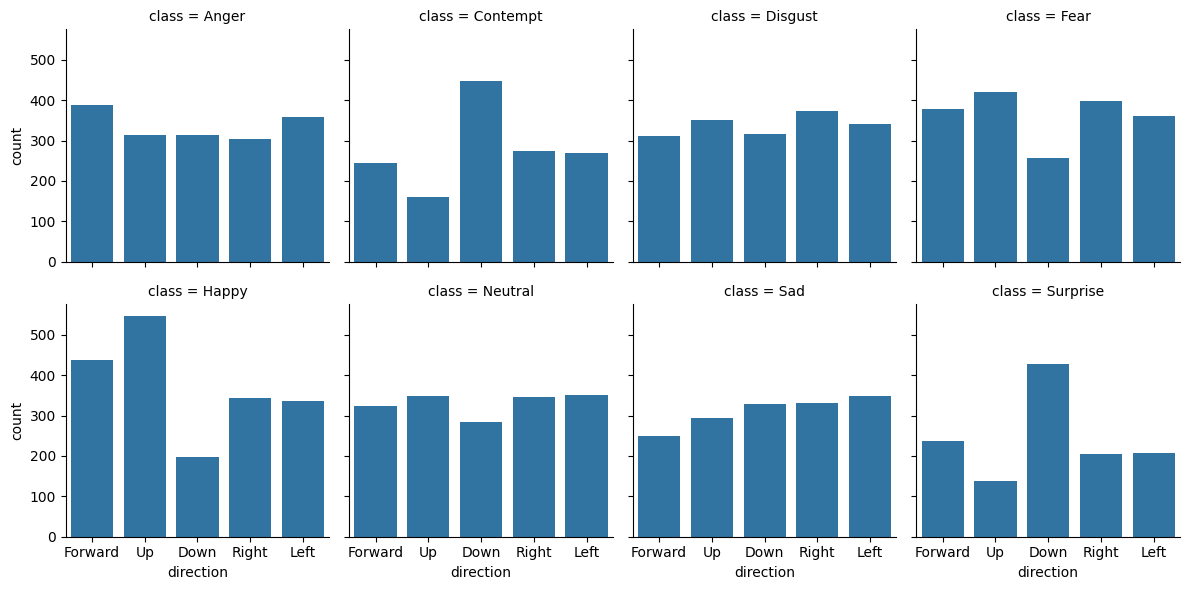

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create separate histograms for each class
g = sns.FacetGrid(direction_counts, col='class', col_wrap=4, height=3)
g.map(sns.barplot, 'direction', 'count')

plt.show()


In [64]:
balanced_df.head()

,class,filename,pitch,yaw,roll,direction
0,1,image0017224.jpg,0.000396,0.059501,0.016278,0
1,3,image0007114.jpg,-0.037717,-0.016217,0.030294,0
2,5,image0039192.jpg,0.004534,0.188617,0.007653,0
3,4,image0004033.jpg,0.041152,-0.053629,0.001548,0
4,4,image0034355.jpg,-0.049342,0.130348,0.007723,0


In [20]:
balanced_df.to_csv("AffectNet_balanced_train.csv", index=False)

In [46]:
# Map class values to emotion labels
emotion_labels = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
df['class'] = df['class'].map({i+1: label for i, label in enumerate(emotion_labels)})

# Map direction values to direction labels
direction_labels = ['Forward', 'Up', 'Down', 'Right', 'Left']
df['direction'] = df['direction'].map({i: label for i, label in enumerate(direction_labels)})
df.head()

,class,filename,pitch,yaw,roll,direction
0,Anger,image0012261.jpg,-0.214550,0.152226,0.103692,Down
1,Anger,image0003195.jpg,0.207676,-0.255355,0.036119,Down
2,Anger,image0010070.jpg,-0.204092,0.133176,-0.009492,Forward
3,Anger,image0017195.jpg,0.009019,0.060406,-0.076559,Up
4,Anger,image0014177.jpg,-0.001475,0.212992,0.076477,Down


In [47]:
# Assuming your original dataframe is named "df"
# Pivot the dataframe and calculate the count of each emotion for each direction
pivot_df = pd.pivot_table(df, index='direction', columns='class', aggfunc='count', fill_value=0)['filename']

# Calculate the overall count for each emotion
overall_count = pivot_df.sum()

# Add a row for the overall count
pivot_df.loc['Overall'] = overall_count

# Rename the columns as per the desired emotions
pivot_df.columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [48]:
pivot_df

,Anger,Contempt,Disgust,Fear,Happy,Neutral,Sad,Surprise
direction,,,,,,,,
Down,1858,2561,1765,1542,1222,1602,2005,2532
Forward,427,278,339,425,487,356,279,252
Left,563,450,573,610,560,608,575,347
Right,303,273,373,398,344,345,331,204
Up,746,372,840,930,1297,798,664,336
Overall,3897,3934,3890,3905,3910,3709,3854,3671


In [49]:
print(pivot_df.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
 & Anger & Contempt & Disgust & Fear & Happy & Neutral & Sad & Surprise \\
direction &  &  &  &  &  &  &  &  \\
\midrule
Down & 1858 & 2561 & 1765 & 1542 & 1222 & 1602 & 2005 & 2532 \\
Forward & 427 & 278 & 339 & 425 & 487 & 356 & 279 & 252 \\
Left & 563 & 450 & 573 & 610 & 560 & 608 & 575 & 347 \\
Right & 303 & 273 & 373 & 398 & 344 & 345 & 331 & 204 \\
Up & 746 & 372 & 840 & 930 & 1297 & 798 & 664 & 336 \\
Overall & 3897 & 3934 & 3890 & 3905 & 3910 & 3709 & 3854 & 3671 \\
\bottomrule
\end{tabular}



In [65]:
# Map class values to emotion labels
emotion_labels = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
balanced_df['class'] = balanced_df['class'].map({i+1: label for i, label in enumerate(emotion_labels)})

# Map direction values to direction labels
direction_labels = ['Forward', 'Up', 'Down', 'Right', 'Left']
balanced_df['direction'] = balanced_df['direction'].map({i: label for i, label in enumerate(direction_labels)})
balanced_df.head()

,class,filename,pitch,yaw,roll,direction
0,Anger,image0017224.jpg,0.000396,0.059501,0.016278,Forward
1,Disgust,image0007114.jpg,-0.037717,-0.016217,0.030294,Forward
2,Happy,image0039192.jpg,0.004534,0.188617,0.007653,Forward
3,Fear,image0004033.jpg,0.041152,-0.053629,0.001548,Forward
4,Fear,image0034355.jpg,-0.049342,0.130348,0.007723,Forward


In [66]:
# Pivot the dataframe and calculate the count of each emotion for each direction
pivot_df = pd.pivot_table(balanced_df, index='direction', columns='class', aggfunc='count', fill_value=0)['filename']

# Calculate the overall count for each emotion
overall_count = pivot_df.sum()

# Add a row for the overall count
pivot_df.loc['Overall'] = overall_count

# Rename the columns as per the desired emotions
pivot_df.columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

pivot_df

,Anger,Contempt,Disgust,Fear,Happy,Neutral,Sad,Surprise
direction,,,,,,,,
Down,313,448,316,257,198,283,328,428
Forward,389,245,310,379,439,323,249,237
Left,359,268,341,360,337,350,348,208
Right,303,273,373,398,344,345,331,204
Up,313,159,351,419,548,349,295,137
Overall,1677,1393,1691,1813,1866,1650,1551,1214


In [67]:
print(pivot_df.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
 & Anger & Contempt & Disgust & Fear & Happy & Neutral & Sad & Surprise \\
direction &  &  &  &  &  &  &  &  \\
\midrule
Down & 313 & 448 & 316 & 257 & 198 & 283 & 328 & 428 \\
Forward & 389 & 245 & 310 & 379 & 439 & 323 & 249 & 237 \\
Left & 359 & 268 & 341 & 360 & 337 & 350 & 348 & 208 \\
Right & 303 & 273 & 373 & 398 & 344 & 345 & 331 & 204 \\
Up & 313 & 159 & 351 & 419 & 548 & 349 & 295 & 137 \\
Overall & 1677 & 1393 & 1691 & 1813 & 1866 & 1650 & 1551 & 1214 \\
\bottomrule
\end{tabular}



#### same for val

In [21]:
grouped = val_df.groupby('direction')

min_count = grouped.size().min()

balanced_df = grouped.apply(lambda x: x.sample(n=min_count))

balanced_df = balanced_df.reset_index(drop=True)

print(balanced_df)

      class          filename     pitch       yaw      roll  direction
0         7  image0000526.jpg -0.016940 -0.029193  0.018012          0
1         2  image0004039.jpg -0.065622  0.070577  0.006867          0
2         6  image0002812.jpg -0.054573  0.171232 -0.042992          0
3         4  image0002061.jpg -0.001486  0.104810  0.007792          0
4         2  image0003612.jpg  0.025797  0.089706 -0.003122          0
...     ...               ...       ...       ...       ...        ...
1620      5  image0000429.jpg -0.164133 -0.382281 -0.150819          4
1621      7  image0001686.jpg  0.043296 -0.407772  0.158526          4
1622      5  image0002902.jpg -0.027315 -0.102351 -0.017080          4
1623      2  image0000371.jpg  0.106822 -0.630513  0.042165          4
1624      6  image0002802.jpg  0.076643 -0.453756  0.272353          4

[1625 rows x 6 columns]


In [22]:
direction_counts = balanced_df.groupby(['direction']).size().reset_index(name='count')
direction_counts

,direction,count
0,0,325
1,1,325
2,2,325
3,3,325
4,4,325


In [23]:
direction_counts = balanced_df.groupby(['class', 'direction']).size().reset_index(name='count')
direction_counts

,class,direction,count
0,1,0,49
1,1,1,38
2,1,2,53
3,1,3,45
4,1,4,31
5,2,0,32
6,2,1,21
7,2,2,52
8,2,3,33
9,2,4,36


/home/sefni/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


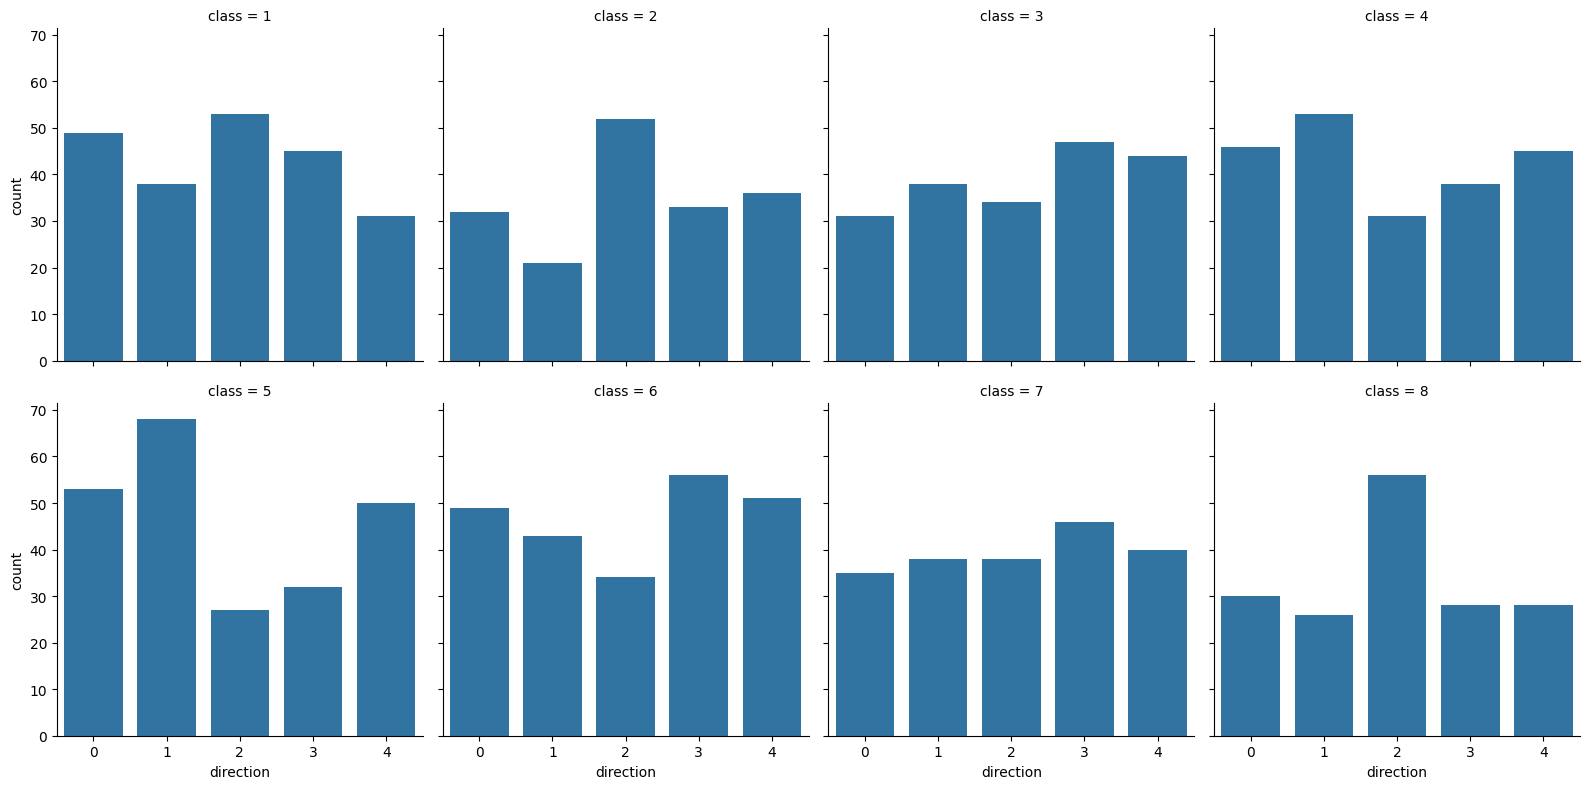

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create separate histograms for each class
g = sns.FacetGrid(direction_counts, col='class', col_wrap=4, height=4)
g.map(sns.barplot, 'direction', 'count')
plt.show()

In [25]:
balanced_df.to_csv("AffectNet_balanced_val.csv", index=False)